In [52]:
import numpy as np
import pandas as pd

In [53]:
df=pd.read_csv('Saar.csv')

In [54]:
df

,Unnamed: 0,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3463,3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN
3464,3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN
3465,3465,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN
3466,3466,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.columns

Index(['Unnamed: 0', 'tweet', 'sarcastic', 'sarcasm', 'irony', 'satire',
       'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3468 non-null   int64  
 1   tweet                3467 non-null   object 
 2   sarcastic            3468 non-null   int64  
 3   sarcasm              867 non-null    float64
 4   irony                867 non-null    float64
 5   satire               867 non-null    float64
 6   understatement       867 non-null    float64
 7   overstatement        867 non-null    float64
 8   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 244.0+ KB


In [57]:
df['tweet'] = df['tweet'].astype(str)

In [58]:
import re
def preprocess(text):
    text = text.lower()
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    text = re.sub(r"[^a-zA-Z0-9]", ' ', text)
    text = re.sub(r" +", ' ', text)
    return text

In [59]:
df['tweet'] = df['tweet'].apply(preprocess)

In [60]:
df['tweet'].values

array(['the only thing i got from college is a caffeine addiction',
       'i love it when professors draw a big question mark next to my answer on an exam because i m always like yeah i don t either ',
       'remember the hundred emails from companies when covid started getting real i ve gotten three in regards to support for protests and only shared helpful links and actually said black lives matter we love capitalism ',
       ...,
       'i m finally surfacing after a holiday to scotland and a difficult few days with an ill child hopefully on the mend now happy september all smell the pencil shavings and that new notebook aroma 1st sept has always seemed a lot more promising than 1st january',
       'couldn t be prouder today well done to every student who got their gcses this morning after 18 months that would challenge anyone in history at any stage in their lives the teachers did an amazing job gcseresults2021 gcseresults',
       'overheard as my 13 year old games with a frie

In [61]:
df["sarcastic"].value_counts()

sarcastic
0    2601
1     867
Name: count, dtype: int64

In [62]:
# Balance the Dataset
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

balanced_text_df, balanced_labels = ros.fit_resample(pd.DataFrame(df['tweet']), df['sarcastic'])
balanced_text = balanced_text_df['tweet'].values  # Extract tweets back as 1D array


 




In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    balanced_text, balanced_labels,
    test_size=0.2, random_state=42, stratify=balanced_labels
)

In [64]:
X_train.shape

(4161,)

In [65]:
y_train.shape

(4161,)

In [66]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer, create_optimizer

In [67]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased') 

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

# Tokenization and Padding 

In [68]:
max_len = 63
train_encodings = tokenizer(
    list(X_train), truncation=True, padding='max_length',
    max_length=max_len, return_tensors='tf'
)

test_encodings = tokenizer(
    list(X_test), truncation=True, padding='max_length',
    max_length=max_len, return_tensors='tf'
)

In [69]:
# Convert labels to array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [70]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings), y_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings), y_test
)).batch(16)

In [71]:
# Create optimizer
num_train_steps = int(len(X_train) / 16 * 10)  # batch_size=16, epochs=10
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0
)

In [72]:
# Compile
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [73]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

Epoch 1/10
261/261 [==============================] - 393s 1s/step - loss: 0.6491 - accuracy: 0.6013 - val_loss: 0.5500 - val_accuracy: 0.7339
Epoch 2/10
261/261 [==============================] - 414s 2s/step - loss: 0.3543 - accuracy: 0.8532 - val_loss: 0.3354 - val_accuracy: 0.8665
Epoch 3/10
261/261 [==============================] - 415s 2s/step - loss: 0.1204 - accuracy: 0.9615 - val_loss: 0.3304 - val_accuracy: 0.8982
Epoch 4/10
261/261 [==============================] - 405s 2s/step - loss: 0.0434 - accuracy: 0.9875 - val_loss: 0.5849 - val_accuracy: 0.8377
Epoch 5/10
261/261 [==============================] - 419s 2s/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.4787 - val_accuracy: 0.8790
Epoch 6/10
261/261 [==============================] - 396s 2s/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.4367 - val_accuracy: 0.8915
Epoch 7/10
261/261 [==============================] - 415s 2s/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.4376 - val_accuracy: 0.8991

In [75]:

# Evaluate
preds = model.predict(test_dataset).logits
pred_labels = tf.argmax(preds, axis=1).numpy()


66/66 [==============================] - 26s 377ms/step


In [76]:
from sklearn.metrics import accuracy_score

In [77]:
pred_labels

array([0, 1, 1, ..., 1, 0, 1])

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90       521
           1       0.87      0.95      0.91       520

    accuracy                           0.90      1041
   macro avg       0.90      0.90      0.90      1041
weighted avg       0.90      0.90      0.90      1041



In [80]:
confusion_matrix(y_test, pred_labels)

array([[444,  77],
       [ 26, 494]])

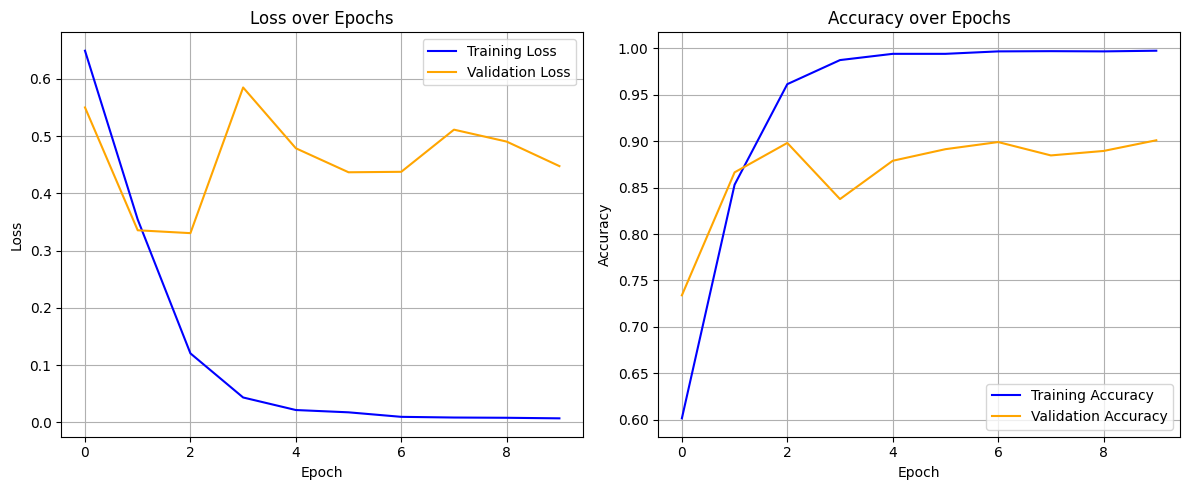

In [81]:
import matplotlib.pyplot as plt

# 📉 Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 📈 Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [82]:
# Save model and tokenizer
model.save_pretrained('saved_model/sarcasm_distilbert')
tokenizer.save_pretrained('saved_model/sarcasm_distilbert')

('saved_model/sarcasm_distilbert/tokenizer_config.json',
 'saved_model/sarcasm_distilbert/special_tokens_map.json',
 'saved_model/sarcasm_distilbert/vocab.txt',
 'saved_model/sarcasm_distilbert/added_tokens.json')

In [83]:
# Load your fine-tuned model and tokenizer
model = TFDistilBertForSequenceClassification.from_pretrained('saved_model/sarcasm_distilbert')
tokenizer = DistilBertTokenizer.from_pretrained('saved_model/sarcasm_distilbert')

# Function to check sarcasm
def detect_sarcasm(text):
    # Preprocess and tokenize
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=64)

    # Get predictions
    outputs = model(inputs)
    logits = outputs.logits

    # Apply softmax to get probabilities
    probs = tf.nn.softmax(logits, axis=1).numpy()

    # Get predicted label (0 or 1)
    pred_label = np.argmax(probs, axis=1)[0]

    # Map label to human-readable output
    label_text = "Sarcastic 🤨" if pred_label == 1 else "Not Sarcastic 🙂"
    confidence = probs[0][pred_label]

    print(f"\n📝 Text: {text}")
    print(f"🔎 Prediction: {label_text} (Confidence: {confidence:.2f})")

    return pred_label, confidence

Some layers from the model checkpoint at saved_model/sarcasm_distilbert were not used when initializing TFDistilBertForSequenceClassification: ['dropout_39']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at saved_model/sarcasm_distilbert and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [93]:
detect_sarcasm("Waking up early makes me feel productive.")
detect_sarcasm("Sure, because turning in the project late will definitely impress the boss")


📝 Text: Waking up early makes me feel productive.
🔎 Prediction: Not Sarcastic 🙂 (Confidence: 1.00)

📝 Text: Sure, because turning in the project late will definitely impress the boss
🔎 Prediction: Sarcastic 🤨 (Confidence: 1.00)


(np.int64(1), np.float32(0.99975044))